# Random Forest ~Ensemble Model~

In [12]:
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = fetch_mldata('MNIST original')
mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                           mnist.target.astype('int32'), random_state=42)
mnist_X = mnist_X / 255.0
train_X, test_X, train_y, test_y = train_test_split(mnist_X, mnist_y,
                                                    test_size=0.2,
                                                    random_state=43)

## scikit-learnの分類器を使用

In [7]:
clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(train_X, train_y)

In [9]:
pred_y = clf.predict(test_X)
f1_score(test_y[:len(pred_y)], pred_y, average='macro')

0.9657954634072945

## Confusion Matrix

In [17]:
category_dict = dict([(x, str(x)) for x in range(10)])

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(category_dict))
    plt.xticks(tick_marks, category_dict, rotation=45)
    plt.yticks(tick_marks, category_dict)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[674   0   0   0   1   1   3   0   3   2]
 [  0 768   3   3   0   1   2   1   1   0]
 [  4   1 662   2   2   0   4   3   5   0]
 [  0   0  11 688   0   4   1   4  12   4]
 [  2   1   2   0 667   0   3   2   1  11]
 [  0   0   2  12   3 619   4   1   5   1]
 [  2   2   1   0   2   3 666   0   2   0]
 [  0   1   5   2   3   0   0 698   2  11]
 [  1   3   3   0   7   3   1   0 644   4]
 [  2   2   4   8  10   3   0  11   4 684]]


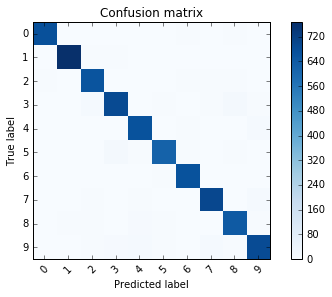

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

## 応用
- modelのパラメータを調整して精度をあげてみる。grid_searchなど。